In [2]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv
{'Bengaluru_House_Data.csv': b'area_type,availability,location,size,society,total_sqft,bath,balcony,price\r\nSuper built-up  Area,19-Dec,Electronic City Phase II,2 BHK,Coomee ,1056,2,1,39.07\r\nPlot  Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120\r\nBuilt-up  Area,Ready To Move,Uttarahalli,3 BHK,,1440,2,3,62\r\nSuper built-up  Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95\r\nSuper built-up  Area,Ready To Move,Kothanur,2 BHK,,1200,2,1,51\r\nSuper built-up  Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2,1,38\r\nSuper built-up  Area,18-May,Old Airport Road,4 BHK,Jaades ,2732,4,,204\r\nSuper built-up  Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4,,600\r\nSuper built-up  Area,Ready To Move,Marathahalli,3 BHK,,1310,3,1,63.25\r\nPlot  Area,Ready To Move,Gandhi Bazar,6 Bedroom,,1020,6,,370\r\nSuper built-up  Area,18-Feb,Whitefield,3 BHK,,1800,2,2,70\r\nPlot  Area,Ready To Move,Whitefiel

In [3]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Bengaluru_House_Data.csv')

In [5]:
dataset=pd.read_csv('Bengaluru_House_Data.csv')


In [6]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
dataset.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [8]:
print(dataset['size'].isna().sum())

16


In [9]:
dataset.drop(columns=['society','balcony','availability','area_type'], inplace=True)

In [10]:
dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
dataset['location']=dataset['location'].fillna('whitefield')

In [12]:
dataset['bath']=dataset['bath'].fillna(dataset['bath'].median())

In [13]:
dataset.isnull().sum()

,0
location,0
size,16
total_sqft,0
bath,0
price,0


In [14]:
print(dataset['size'].isna().sum())

16


In [15]:
dataset = dataset.dropna(subset=['size'])

In [16]:
dataset['BHK'] = dataset['size'].str.split().str.get(0).astype(int)

In [17]:
dataset.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
dataset['total_sqft']

,total_sqft
0,1056
1,2600
2,1440
3,1521
4,1200
...,...
13315,3453
13316,3600
13317,1141
13318,4689


In [19]:
def range_converter(x):
    N =x.split('-')
    if len(N)==2:
        return(float(N[0])+float(N[1]))/2
    try:
        return float(x)
    except:
        return None


In [20]:
dataset.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [21]:
print(type('total_sqft'))

<class 'str'>


In [23]:
dataset['total_sqft'] = pd.to_numeric(dataset['total_sqft'], errors='coerce')

In [24]:
dataset['price_per_sqft'] = (dataset['price']*100000)/dataset['total_sqft']

In [25]:
dataset.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
dataset['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [27]:
dataset['location']=dataset['location'].apply(lambda x:x.strip())

In [28]:
location_count= dataset['location'].value_counts()

In [29]:
location_count

,count
location,
Whitefield,540
Sarjapur Road,397
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
Chikkanahalli,1
Halanayakanahalli,1
Park View Layout,1


In [30]:
location_count_less = location_count[location_count<=15]
location_count_less

,count
location,
Varthur Road,15
Nagavarapalya,15
Kodihalli,15
Benson Town,15
Chamrajpet,15
...,...
Chikkanahalli,1
Halanayakanahalli,1
Park View Layout,1


In [31]:
dataset['location']=dataset['location'].apply(lambda x : 'other' if x in location_count_less else x)

In [32]:
dataset['location'].value_counts()

,count
location,
other,3644
Whitefield,540
Sarjapur Road,397
Electronic City,304
Kanakpura Road,273
...,...
Banashankari Stage VI,16
Cooke Town,16
Banashankari Stage II,16


In [33]:
dataset.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13065.000000,13304.000000,13304.000000,13304.000000,1.306500e+04
mean,1554.546892,2.689642,112.582035,2.803743,7.951425e+03
std,1238.422934,1.339345,148.988398,1.294974,1.072767e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.338057e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [34]:
dataset = dataset[(dataset['total_sqft']/dataset['BHK'])>=300]
dataset = dataset[dataset['BHK'] <= 5]
dataset = dataset[dataset['bath'] <= 5]

In [35]:
dataset.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000
mean,1532.425526,2.464909,104.384269,2.569932,6228.735417
std,1110.321840,0.851448,128.563426,0.783918,4008.780811
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1110.250000,2.000000,49.000000,2.000000,4200.689655
50%,1290.000000,2.000000,69.000000,2.000000,5285.228194
75%,1656.000000,3.000000,110.000000,3.000000,6857.142857
max,52272.000000,5.000000,2912.000000,5.000000,176470.588235


In [36]:
dataset.shape

(12026, 7)

In [37]:
dataset.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [38]:
dataset = dataset[['location', 'total_sqft' , 'BHK' , 'bath' , 'price']]

In [39]:
lower_limit=dataset['price'].mean()-dataset['price'].std()*3
upper_limit=dataset['price'].mean()+dataset['price'].std()*3
dataset['price']=np.where(dataset['price']>upper_limit,
                          upper_limit,
                          np.where(dataset['price']<lower_limit,lower_limit,dataset['price']))

In [40]:
dataset.head()

,location,total_sqft,BHK,bath,price
0,Electronic City Phase II,1056.0,2,2.0,39.07
1,Chikka Tirupathi,2600.0,4,5.0,120.00
2,Uttarahalli,1440.0,3,2.0,62.00
3,Lingadheeranahalli,1521.0,3,3.0,95.00
4,Kothanur,1200.0,2,2.0,51.00


In [41]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer(
    transformers=[
        ('encoder',OneHotEncoder(),['location']),
        ('scaler',StandardScaler(),['total_sqft','BHK','bath'])
    ],

remainder='passthrough'
)

In [44]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=300)

In [45]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct,model)

In [46]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'bath'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300))])

In [47]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'bath'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300))])

In [49]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(x_test)
print("R2 Score:" , r2_score(y_test ,y_pred))

R2 Score: 0.7012606369617842


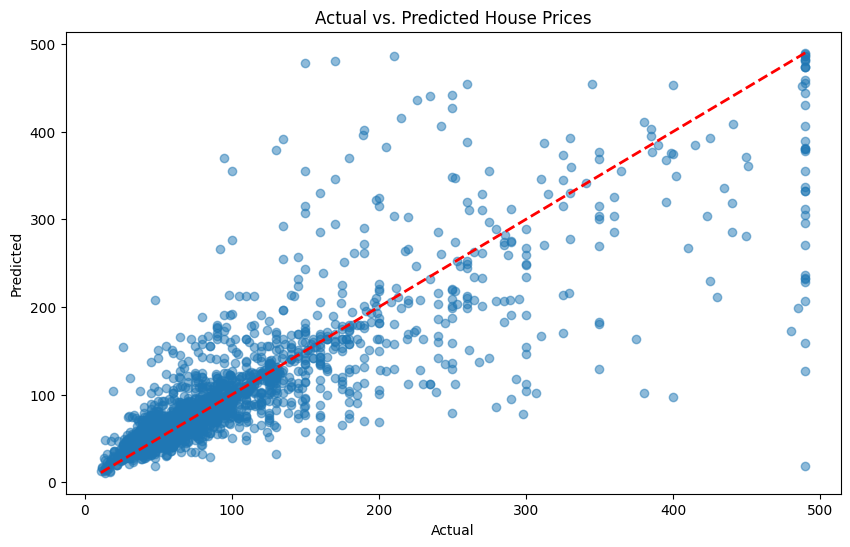

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [51]:
import pickle
pickle.dump(pipe , open('random_forest_house_price_model.pkl', 'wb'))
pickle.dump(dataset , open('dataset.pkl','wb'))

In [52]:
import pickle
pickle.dump(dataset, open('dataset.pkl', 'wb'))
pickle.dump(pipe, open('random_forest_house_price_model.pkl', 'wb'))


In [53]:
import pickle
dataset = pickle.load(open('dataset.pkl', 'rb'))
print(type(dataset))  # ➤ Should print: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [2]:
import pandas as pd

# Load the CSV file properly
dataset = pd.read_csv('/content/Bengaluru_House_Data.csv')

# Confirm the type (should be DataFrame)
print(type(dataset))

# Now try to access the 'location' column
locations = dataset['location'].unique()
print(locations[:5])  # print first 5 unique locations to verify


<class 'pandas.core.frame.DataFrame'>
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli'
 'Lingadheeranahalli' 'Kothanur']


In [3]:
def predict_price(location, sqft, bath, bhk, availability):
    input_df = pd.DataFrame([[location, sqft, bath, bhk, availability]],
                            columns=['location', 'total_sqft', 'bath', 'bhk', 'availability'])
    return pipeline.predict(input_df)[0]


In [4]:
predict_price('1st Phase JP Nagar', 1000, 2, 2, 'Ready To Move')


NameError: name 'pipeline' is not defined